In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
sns.set(rc={'figure.figsize': [15, 8]}, font_scale=1.6)

In [2]:
df = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
df.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 40 to 8
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.6+ KB


In [4]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


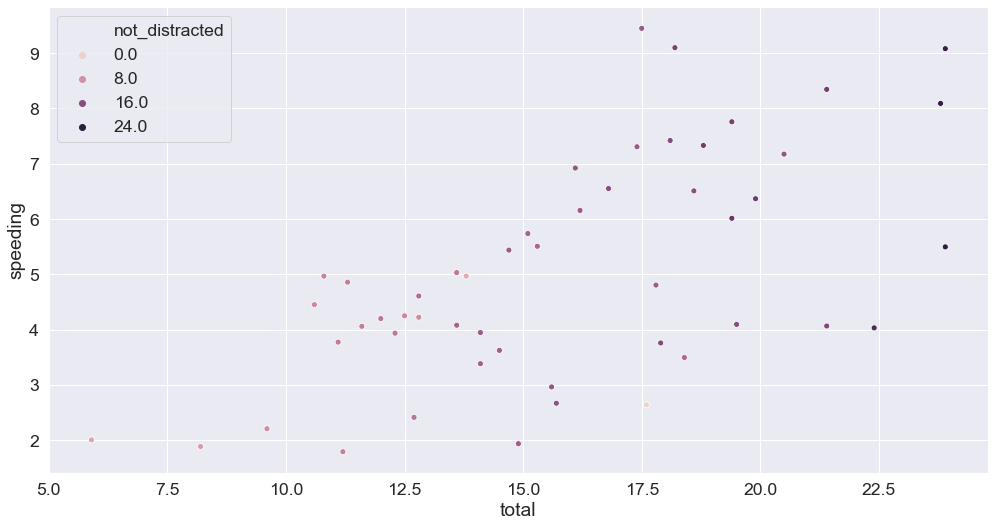

In [7]:
sns.scatterplot('total', 'speeding', data=df, hue='not_distracted')

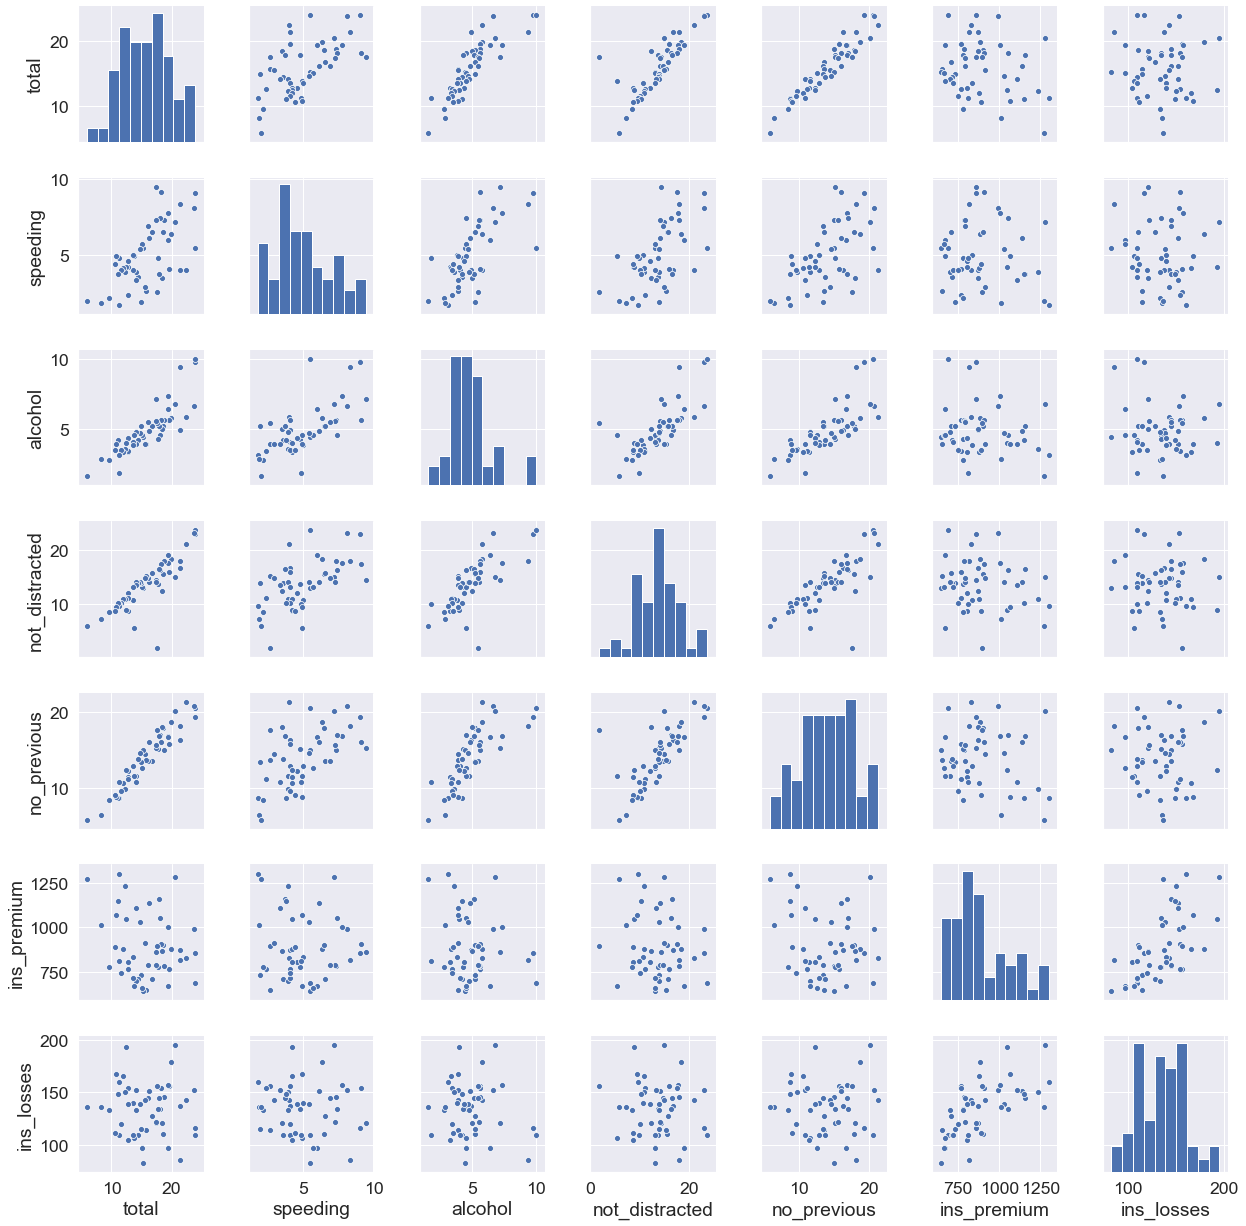

In [9]:
sns.pairplot(df)

In [14]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [15]:
df_city=df[['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev']]

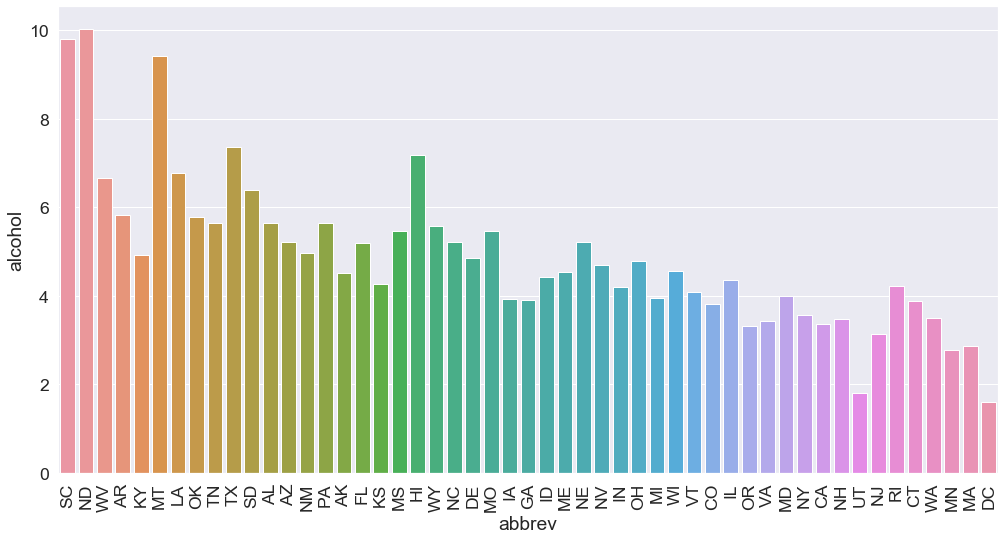

In [21]:
plt.xticks(rotation=90)
sns.barplot('abbrev','alcohol', data=df)

In [27]:
df1=df.drop(axis=1,columns='abbrev')
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
scaled_df1 = ms.fit_transform(df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'])

In [29]:
scaled_df1.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,1.000000,0.951946,0.971699,0.967262,0.875098,0.329022,0.299384
1,1.000000,0.483808,1.000000,1.000000,0.952796,0.070941,0.240739
2,0.994444,0.822669,0.600474,0.973745,0.962679,0.531642,0.623137
3,0.916667,0.292505,0.501007,0.881056,1.000000,0.281066,0.532357
4,0.861111,0.296944,0.394198,0.681795,0.673862,0.349551,0.485406


In [30]:
scaled_df1.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.549455,0.418673,0.390028,0.539390,0.526975,0.371456,0.461869
std,0.229000,0.263482,0.204752,0.205880,0.244777,0.270326,0.221690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380556,0.257835,0.272469,0.398064,0.354226,0.191749,0.284701
50%,0.538889,0.367720,0.350622,0.552349,0.512029,0.329022,0.475765
75%,0.700000,0.606816,0.474956,0.656591,0.705787,0.554893,0.616978
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile



In [50]:
x = scaled_df1.drop('total',axis=1)
y = scaled_df1['total']


In [51]:
all_features = x.columns
all_features


Index(['speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium',
       'ins_losses'],
      dtype='object')

In [52]:
selector = SelectKBest(k=6, score_func=f_regression)


In [53]:
selector.fit(x, y)


SelectKBest(k=6, score_func=<function f_regression at 0x0000026CA7597168>)

In [54]:
pd.DataFrame(selector.scores_, index=x.columns)


,0
speeding,29.273569
alcohol,130.453850
not_distracted,106.484544
no_previous,522.619315
ins_premium,2.035333
ins_losses,0.063626


In [55]:
x = scaled_df1.drop('total', axis=1)
y = scaled_df1['total']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [57]:
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
model.predict(x_test)


array([0.35793404, 0.72996874, 0.57726014, 0.23158386, 0.44967841,
       0.62254677, 0.98170851, 0.57082468, 0.3962926 , 1.09568845,
       0.30555978])

In [59]:
y_test


33    0.438889
12    0.705556
26    0.522222
48    0.205556
35    0.427778
22    0.572222
3     0.916667
28    0.500000
32    0.455556
1     1.000000
42    0.316667
Name: total, dtype: float64

In [60]:
model.score(x_test, y_test)


0.9374648069460723

In [61]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()


In [62]:
knr.fit(x_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [63]:
knr.predict(x_test)


array([0.37666667, 0.66555556, 0.55444444, 0.29      , 0.47555556,
       0.68888889, 0.75      , 0.52      , 0.35888889, 0.86444444,
       0.35111111])

In [64]:
knr.score(x_test, y_test)


0.8491456215793589